In [1]:
import sympy
import numpy as np
from sys import path
from matplotlib import pyplot as plt
from matplotlib import style

In [2]:
path.insert(0, '../src')
path.insert(1, '../src/visualization')

In [3]:
from visualize import (plot_vector, plot_linear_transformation, plot_linear_transformations, 
                       plot_eigen)
from pagerank import pagerank

In [4]:
%matplotlib inline
style.use('default')
sympy.init_printing(use_latex='mathjax')  # configures the display of mathematics

### Fundamental vector operations

Two operations are the foundation of everything: **vector addition**, and **multiplication by a scalar** (i.e., scaling).

Suppose we have two vectors: 

$$
   \mathbf{a} = \left[ \begin{array}{c} -2 \\ 1  \end{array} \right], \quad  
   \mathbf{b} = \left[ \begin{array}{c} 1 \\ -3  \end{array} \right] 
$$

We can visualize vector addition as follows: draw vector $\mathbf{a}$ with its tail at the origin; then draw vector $\mathbf{b}$ with its tail on the head of $\mathbf{a}$. If you now draw a vector from the origin to the head of $\mathbf{b}$, that vector is $\mathbf{a} + \mathbf{b}$.

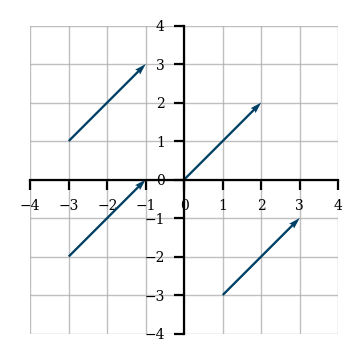

In [5]:
vectors = [(2, 2)]
tails = [(-3, -2), (-3, 1), (0, 0), (1, -3)]
plot_vector(vectors, tails)

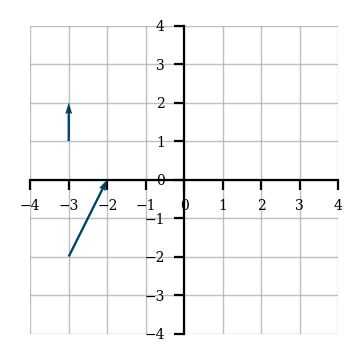

In [6]:
vectors = np.array([[1, 2], [0, 1]])
tails = np.array([[-3, -2], [-3, 1]])
plot_vector(vectors, tails)

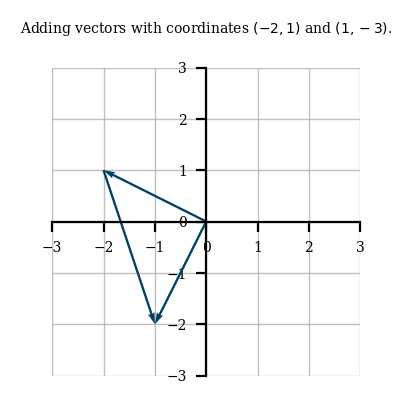

In [7]:
a = np.array((-2, 1))
b = np.array((1, -3))
origin = np.array((0, 0 ))

vectors = [a, b, a + b]
tails = [origin, a, origin]

plot_vector(vectors, tails)
plt.title("Adding vectors with coordinates $(-2, 1)$ and $(1,-3)$.\n");

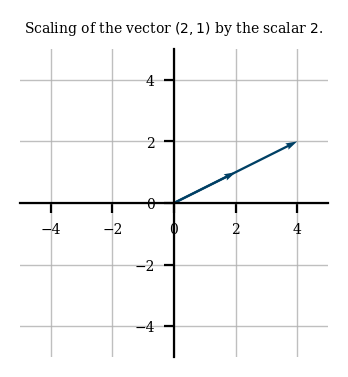

In [8]:
c = np.array((2, 1))
vectors = [c, 2 * c]
plot_vector(vectors)
plt.title('Scaling of the vector $(2,1)$ by the scalar $2$.');

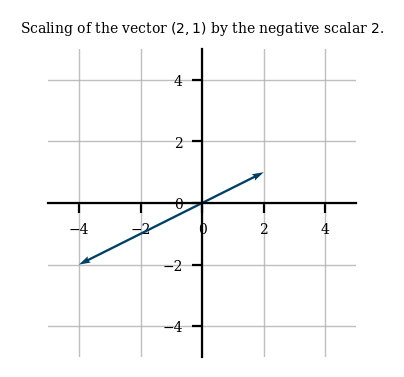

In [9]:
c = np.array((2, 1))
vectors = [c, 2 * -c]
plot_vector(vectors)
plt.title('Scaling of the vector $(2,1)$ by the negative scalar $2$.');

### Basis vectors

Since every vector is the sum of a horizontal and a vertical one, it means we can generate *all vectors* by adding scaled versions of $\mathbf{i}$ and $\mathbf{j}$. That's why they are called **basis vectors**.

For any vector, its components are the scalars we need to multiply the basis vectors by to generate it. For example:

$$
 \left[ \begin{array}{c} 3 \\ 2  \end{array} \right] =
 3\cdot\left[ \begin{array}{c} 1 \\ 0  \end{array} \right] +
 2\cdot\left[ \begin{array}{c} 0 \\ 1  \end{array} \right] =
 3\,\mathbf{i} + 2\,\mathbf{j}
$$


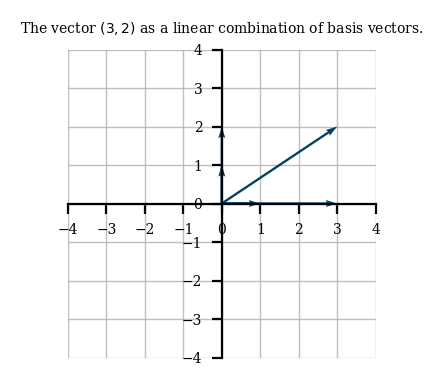

In [10]:
i = np.array((1, 0))
j = np.array((0, 1))

vec = 3 * i + 2 * j
vectors = [i, j, 3 * i, 2* j, vec]
plot_vector(vectors)
plt.title('The vector $(3, 2)$ as a linear combination of basis vectors.');

### Linear combination and span

Adding two vectors that were each multiplied by a scalar is called a **linear combination** of those two vectors. Thus, we say that every vector is some linear combination of the basis vectors.

This brings us to the idea of the **span** of two vectors: the set of all possible linear combinations of the two.
[Linear combinations, span, and basis vectors](https://www.youtube.com/watch?v=k7RM-ot2NWY&feature=youtu.be)

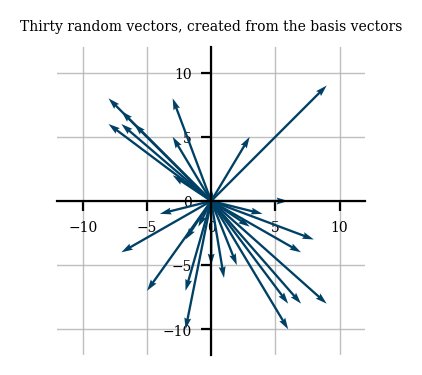

In [11]:
vectors = []

for _ in range(30):
    m = np.random.randint(-10, 10)
    n = np.random.randint(-10, 10)
    vectors.append(i * m + j * n)
    
plot_vector(vectors)
plt.title('Thirty random vectors, created from the basis vectors');

You can imagine that if we created more and more random vectors in this way, eventually we will fill up the 2D plane. Indeed, the *span* of the basis vectors is the whole 2D space. 

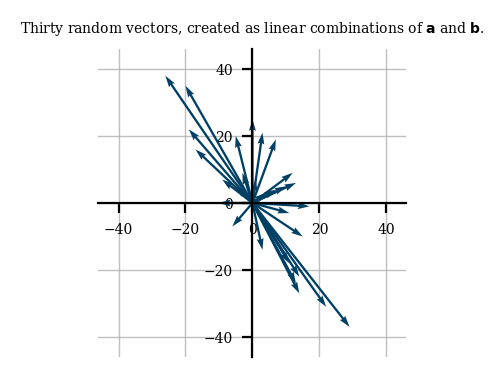

In [12]:
vectors = []

for _ in range(30):
    m = np.random.randint(-10, 10)
    n = np.random.randint(-10, 10)
    vectors.append(m * a + n * b)
    
plot_vector(vectors)
plt.title('Thirty random vectors, created as linear combinations of $\mathbf{a}$ and $\mathbf{b}$.');

In fact, we can *still* fill up the whole plane with infinite linear combinations of $\mathbf{a}$ and $\mathbf{b}$—they span the full 2D space. We're not forced to use the unit vectors $\mathbf{i}$ and $\mathbf{j}$ as our basis vectors: other pairs of vectors could form a basis. With $\mathbf{i}$ and $\mathbf{j}$, we saw that the components of a vector $\mathbf{v}$ are the scalars needed in its corresponding linear combination of the basis vectors. If we were to use another pair of vectors as basis, we would need a different pair of scalars in the linear combination to get the same vector: we are _changing the coordinate system_.

Let's see another situation... we'll make linear combinations of the vector $\mathbf{a}$, and a new vector, $\mathbf{d} = \left[ \begin{array}{c} -1 \\ 0.5  \end{array} \right]$,

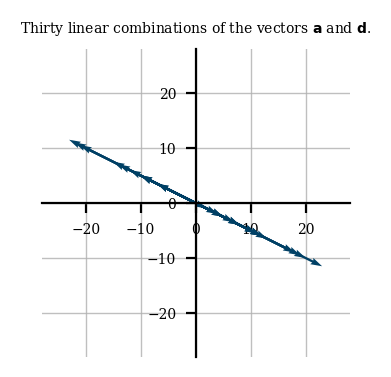

In [13]:
d = np.array((-1, .5))

vectors = []

for _ in range(30):
    m = np.random.randint(-10, 10)
    n = np.random.randint(-10, 10)
    vectors.append(m * a + n * d)
    
plot_vector(vectors)
plt.title('Thirty linear combinations of the vectors $\mathbf{a}$ and $\mathbf{d}$.');

*What's going on?*

Well, the new vector $\mathbf{d}$ happens to be a scaled version of the original vector $\mathbf{a}$—we say that they are `_colinear_`. Thus, all linear combinations of $\mathbf{a}$ and $\mathbf{d}$ end up on one line, which is their span. Their combinations are not able to travel all over the plane!

##### Definition:

> A **basis** for a vector space is a set of _linearly independent_ vectors that _span_ that space.

We saw above that $\mathbf{d}$ is a scalar multiplied by $\mathbf{a}$: it is linearly _dependent_ with $\mathbf{a}$. The vector $\mathbf{b}$, however, is linearly independent with $\mathbf{a}$. Bring in vector $\mathbf{c}$ now: it can be written as a linear combination of $\mathbf{a}$ and $\mathbf{b}$: $\alpha\, \mathbf{a} + \beta\, \mathbf{b} = \mathbf{c}$, for some scalars $\alpha$ and $\beta$. In 2D space, any third vector will be linearly dependent with $\mathbf{a}$ and $\mathbf{b}$: these two form a _full set_ of independent vectors (and a basis).

In 3D space, two vectors that are linearly independent span a plane. We need a third vector that is not a linear combination of the first two to span the whole space, and form a basis. Any fourth vector will be linearly dependent as it can be written as a linear combination of the basis vectors.

##### Key idea:

> In a set of linearly independent vectors, no one vector can be written as a linear combination of the others. The only way to get the zero vector from a linear combination of all the vectors is to multiply them all by zero.

**Note**: Plotting 30 vectors can result in a messy figure. When we want to visualize many vectors like this, we can simplify the plot by only showing the tip (head) of the vector, as a point on the plane.

## Matrices

### What's a matrix?

$$
   \mathbf{a} = \left[ \begin{array}{c} -2 \\ 1  \end{array} \right], \quad  
   \mathbf{b} = \left[ \begin{array}{c} 1 \\ -3  \end{array} \right] 
$$

30 random linear combinations of $\mathbf{a}$ and $\mathbf{b}$ helped us visualize that they can span the 2D space, and nothing is stopping us from using them as a basis if we so desire.

Remember also our vector $\mathbf{c} = \left[ \begin{array}{c} 2 \\ 1  \end{array} \right]$. Choosing $\mathbf{i}$ and $\mathbf{j}$ as a basis, then $\mathbf{c} = 2\,\mathbf{i} + 1\,\mathbf{j}$.

Now imagine that we use the components of $\mathbf{c}$ to make a linear combination of $\mathbf{a}$ and $\mathbf{b}$:

$$
 2\,\mathbf{a} + 1\,\mathbf{b} =
 2\cdot\left[ \begin{array}{c} -2 \\ 1  \end{array} \right] +
 1\cdot\left[ \begin{array}{c} 1 \\ -3  \end{array} \right] = 
  \left[ \begin{array}{c} -3 \\ -1  \end{array} \right]
$$

This is a new vector, let's call it $\mathbf{c}^\prime$: 

- it has components $\left[ \begin{array}{c} 2 \\ 1  \end{array} \right]$ in the $\mathbf{a}$, $\mathbf{b}$ system of coordinates, and 
- it has components
$\left[ \begin{array}{c} -3 \\ -1  \end{array} \right]$ in the $\mathbf{i}$, $\mathbf{j}$ system of coordinates.

This will blow your mind. Arrange the vectors $\mathbf{a}$ and $\mathbf{b}$ as the columns of a matrix, and you'll see that:

$$
   \begin{bmatrix} -2 & 1 \\ 
                    1 & -3  \end{bmatrix}  
   \left[ \begin{array}{c} 2 \\ 1  \end{array} \right] =
  \left[ \begin{array}{c} -3 \\ -1  \end{array} \right]
$$

The matrix $\,A=\begin{bmatrix} -2 & 1 \\ 
                    1 & -3  \end{bmatrix} $  when multiplied by the vector $\mathbf{c}$ gives the vector $\mathbf{c}^\prime$.

##### Key idea:

> The matrix $A$ represents the **linear transformation** that takes vector $\mathbf{c}$ and transforms it into $\mathbf{c}^\prime$.

In [14]:
A = np.array([[-2, 1], [1, -3]])
print(f'A: \n{A}')
print(f'A @ i: \n{A @ i}')
print(f'A @ j: \n{A @ j}')
print(f'c: \n{c}')
print(f'A @ c: \n{A @ c}')

A: 
[[-2  1]
 [ 1 -3]]
A @ i: 
[-2  1]
A @ j: 
[ 1 -3]
c: 
[2 1]
A @ c: 
[-3 -1]


Woot! The matrix $A$ when multiplied by the vector $\mathbf{i}$ gives the vector $\mathbf{a}$ and when multiplied by the vector $\mathbf{j}$ gives the vector $\mathbf{b}$.

Remember that we used the components of $\mathbf{c}$ in a linear combination of $\mathbf{a}$ and $\mathbf{b}$ to get $\mathbf{c}^\prime$: $2\,\mathbf{a} + 1\,\mathbf{b}$.
What we find is that the linear transformation represented by the matrix $A$, transforms the vector $\mathbf{c}$ to the linear combination of the transformed $\mathbf{i}$ and $\mathbf{j}$.

Since _all_ vectors are a linear combination of the basis vectors, $\mathbf{i}$ and $\mathbf{j}$, scaled by the vector components, they are _all_ transformed to a linear combination of $\mathbf{a}$ and $\mathbf{b}$ with the same scalars.

`plot_linear_transformation()` draws a grid of points on the plane, then applies the linear transformation described by the matrix argument, and plots the transformed grid. This is what $A$ does to the grid:

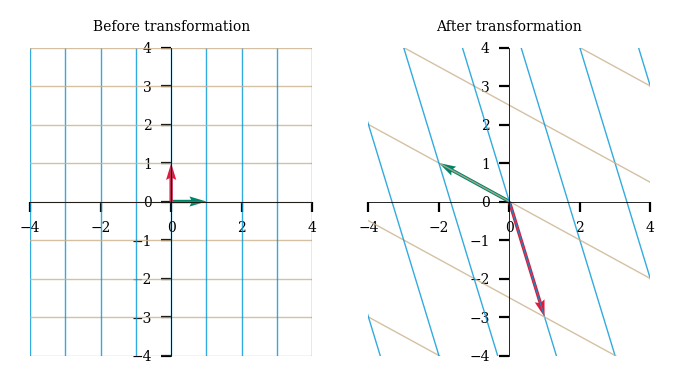

In [15]:
plot_linear_transformation(A)

The whole space get's transformed by matrix-vector multiplication.

##### Key idea:

> A **linear transformation** keeps the origin in place and transforms straight lines to straight lines.

[Linear transformations and matrices](https://www.youtube.com/watch?v=kYB8IZa5AuE&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)

Consider the matrix:

$$ M = \begin{bmatrix} 1 & 2 \\ 2 & 1 \end{bmatrix} $$

The first column corresponds to the vector where $\mathbf{i}$ lands after the transformation, and the second column is where $\mathbf{j}$ lands:
$$
\mathbf{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}  \Rightarrow  \begin{bmatrix} 1 \\ 2 \end{bmatrix} \\
\mathbf{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}  \Rightarrow  \begin{bmatrix} 2 \\ 1 \end{bmatrix}
$$

Any arbitrary vector on the plane, $\mathbf{x} = \left[ \begin{array}{c} x \\ y  \end{array} \right]$, is transformed to: 

$$
  x \left[ \begin{array}{c} 1 \\ 2  \end{array} \right] + 
  y \left[ \begin{array}{c} 2 \\ 1  \end{array} \right]
$$

In [16]:
M = np.array([[1, 2], [2, 1]])
M

array([[1, 2],
       [2, 1]])

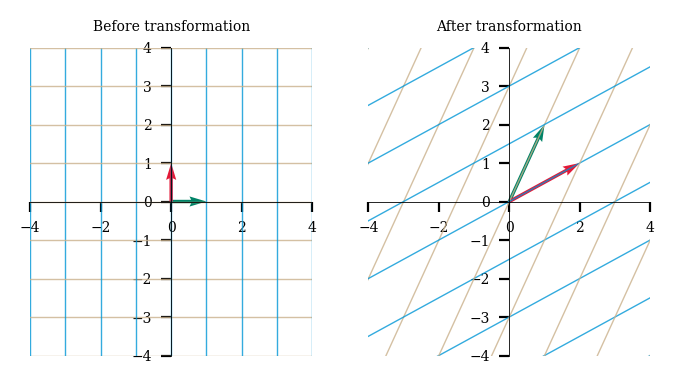

In [17]:
plot_linear_transformation(M)

To see what the transformation does to one particular vector, we can use our custom function `plot_vector` again, using the vector and its transformed self.

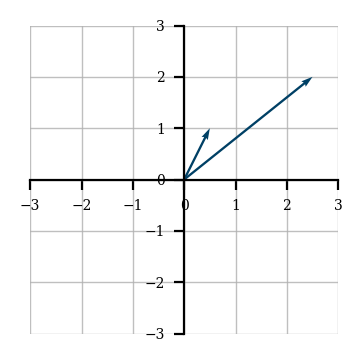

In [18]:
x = np.array((.5, 1))

vectors = [x, M @ x]
plot_vector(vectors)

    Note:

When we represent a matrix in Python using the NumPy array data type, we define it by listing the **rows** of the matrix.

### Matrix-vector multiplication

Consider again the matrix $A$ defined above. As a linear transformation, it transforms any arbitrary vector on the plane, $\mathbf{x} = \left[ \begin{array}{c} x \\ y  \end{array} \right]$ , to: 
$$
  x \left[ \begin{array}{c} -2 \\ 1  \end{array} \right] + 
  y \left[ \begin{array}{c} 1 \\ -3  \end{array} \right]
$$

Since applying the linear transformation *is* computing the matrix-vector multiplication $A\mathbf{x}$, we see that matrix-vector multiplication is a combination of the matrix columns scaled by the vector components:

$$
   A\mathbf{x} = x\,\mathbf{a} + y\,\mathbf{b}
$$
where the vectors $\mathbf{a}$ and $\mathbf{b}$ are the columns of $A$.

##### Key idea:

> The matrix-vector multiplication $A\mathbf{x}$ is a linear combination of the columns of $A$ scaled by the components of $\mathbf{x}$.

This is also the case in 3 dimensions. Consider the matrix $B$ and the vector 
$\mathbf{y}=\left[ \begin{array}{c} x \\ y \\z \end{array} \right]$

$$ B = \begin{bmatrix} 1 & 2 & 4\\ 2 & 1 & -1\\ 0 & 3 & 1 \end{bmatrix} $$

$$ B\mathbf{y} = x\left[ \begin{array}{c} 1 \\ 2 \\0 \end{array} \right] + 
                 y\left[ \begin{array}{c} 2 \\ 1 \\3 \end{array} \right] + 
                 z\left[ \begin{array}{c} 4 \\ -1 \\1 \end{array} \right] 
$$

### Rotation

Imagine that you want a transformation that takes any vector and rotates it 90 degrees to the left. You can visualize that the unit vectors need to be transformed as follows:

$$
\mathbf{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}  \Rightarrow  \begin{bmatrix} 0 \\ 1 \end{bmatrix} \\
\mathbf{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}  \Rightarrow  \begin{bmatrix} -1 \\ 0 \end{bmatrix}
$$

That means that the matrix that transforms all vectors by a left 90-degree **rotation** is:

$$ R = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix} $$

The rotation of any vector $\mathbf{x}$ is the multiplication $R\mathbf{x}$.

### Shear

Another special transformation turns every square into a diamond shape by leaving $\mathbf{x}$ unchanged, and transforming $\,\mathbf{j}$ so its tip falls on the coordinates $(1,1)$: 

$$
\mathbf{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}  \Rightarrow  \begin{bmatrix} 1 \\ 0 \end{bmatrix} \\
\mathbf{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}  \Rightarrow  \begin{bmatrix} 1 \\ 1 \end{bmatrix}
$$

This transformation is often called **shear**, and the matrix is:


$$ S = \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix} $$

The shear of any vector $\mathbf{x}$ is the multiplication $S\mathbf{x}$.

[[ 0  1]
 [-1  0]]


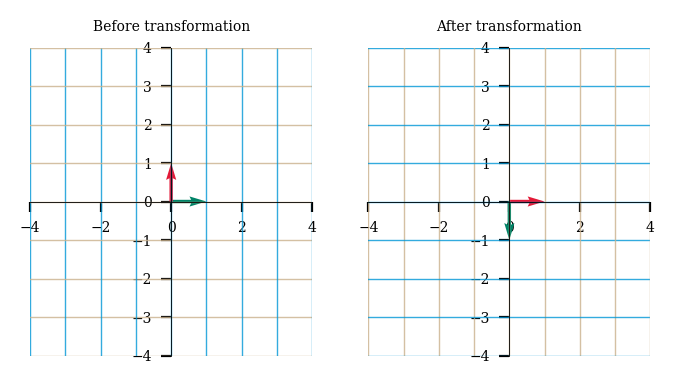

In [19]:
rotation = np.array([[0, 1], [-1, 0]])
print(rotation)
plot_linear_transformation(rotation)

[[1 1]
 [0 1]]


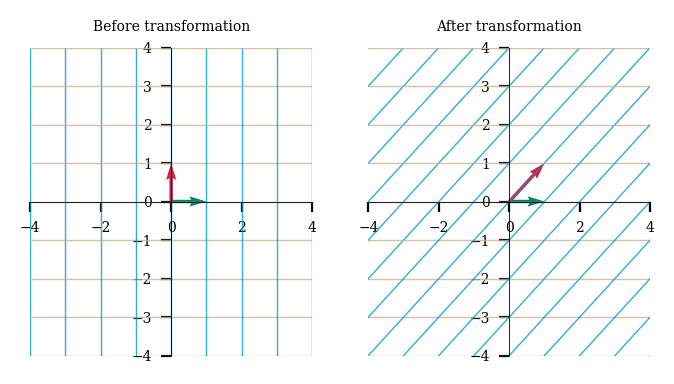

In [20]:
shear = np.array([[1, 1], [0, 1]])
print(shear)
plot_linear_transformation(shear)

    Scaling

A **scaling** transformation doesn't rotate or shear the basis vectors, but scales them in length. For example, a transformation that elongates $\mathbf{i}$ but shrinks $\mathbf{j}$ could do:


$$
\mathbf{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}  \Rightarrow  \begin{bmatrix} 2 \\ 0 \end{bmatrix} \\
\mathbf{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}  \Rightarrow  \begin{bmatrix} 0 \\ 0.5 \end{bmatrix}
$$

Look at what the matrix transformation does in this case…

[[2.  0. ]
 [0.  0.5]]


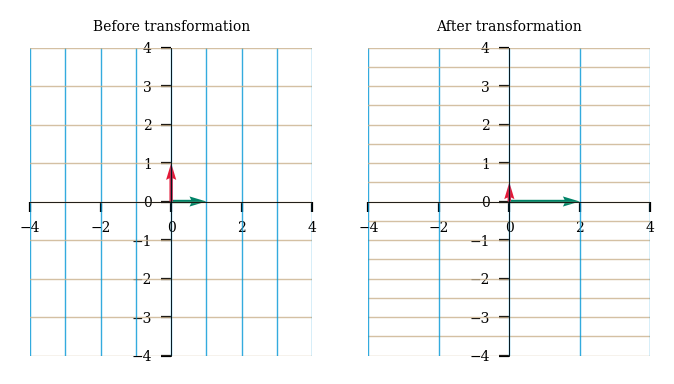

In [21]:
scale = np.array([[2, 0], [0, .5]])
print(scale)
plot_linear_transformation(scale)

    Identity

The common structure of scaling matrices is that they have non-zero values in the diagonal, but zero values elsewhere.
One special scaling matrix leaves the lengths of the basis vectors unchanged: it is called the **identity** matrix:


$$ I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} $$

NumPy creates identity arrays of any size with [`numpy.identity()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html?highlight=eye#numpy.eye), passing the dimension (number of rows and columns) as argument. In the 2D case:

In [22]:
np.eye(2)

array([[1., 0.],
       [0., 1.]])

In [23]:
np.identity(2)

array([[1., 0.],
       [0., 1.]])

    Rotation matrix that rotates every vector 90 degrees clockwise

[[ 0  1]
 [-1  0]]


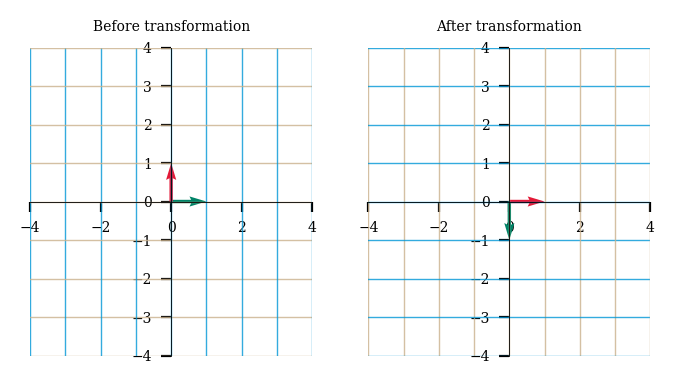

In [24]:
rotation = np.array([[0, 1], [-1, 0]])
print(rotation)
plot_linear_transformation(rotation)

## Matrix-matrix multiplication

What do you think happens when we apply two linear transformations? For example, if we rotate all vectors by 90 degrees to the left, and *then* apply a shear transformation?

Take any vector $\mathbf{x}$, rotate it by multiplying it with the matrix $R$, then take this transformed vector and multiply it by the matrix $S$. The final vector is the result of the two combined linear transformations. It is analogous to the composition of two functions, and its computation leads to a matrix-matrix multiplication:

$$
  S\, R\, \mathbf{x} =
   \begin{bmatrix} 1 & 1 \\
                       0 & 1 \end{bmatrix}
  \begin{bmatrix} 0 & -1 \\
                       1 & 0 \end{bmatrix}
  \mathbf{x}
$$

We can almost work this out in our heads. 
The unit vector $\mathbf{i}$ gets first rotated to $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$ (the first column of $R$), and then is transformed by $S$ via the multiplication:

$$
  S\,\begin{bmatrix} 0 \\ 1 \end{bmatrix} =
    \begin{bmatrix} 1 & 1 \\
                    0 & 1 \end{bmatrix}
  \begin{bmatrix} 0 \\ 1 \end{bmatrix} =
  0 \begin{bmatrix} 1 \\ 0 \end{bmatrix}+
  1 \begin{bmatrix} 1 \\ 1 \end{bmatrix} =
    \begin{bmatrix} 1 \\ 1 \end{bmatrix}
$$

Similarly for the unit vector $\mathbf{j}$, we now find it lands on $\begin{bmatrix} -1 \\ 0 \end{bmatrix}$. We have the two columns of the resulting matrix from the multiplication $SR$.

In [25]:
shear @ rotation

array([[-1,  1],
       [-1,  0]])

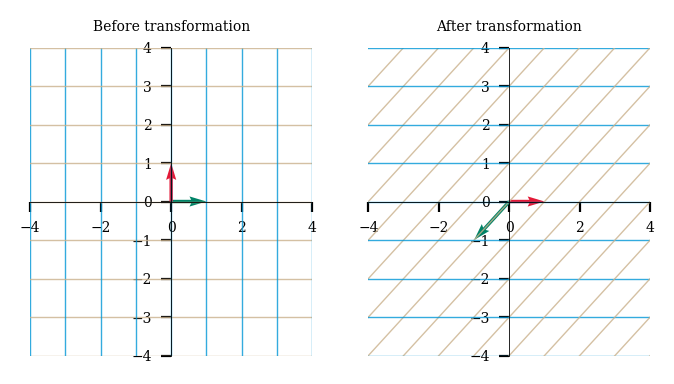

In [26]:
plot_linear_transformation(shear @ rotation)

    Key idea:

> Matrix multiplication corresponds to composition of linear transformations, i.e., applying two transformations in sequence.

This view of matrix multiplication will save you from a lot of unnecessary memorization. It also illuminates the properties of matrix multiplications. For example, is it the same to apply shear and *then* rotate, instead of the other way around? 

This is the same question as asking if matrix multiplication is commutative. Is $SR$ the same as $RS$?

We have a helper function that plots the grid lines on a plane after two transformations in sequence. Let's try it with $S$ and $R$ in swapped orders.

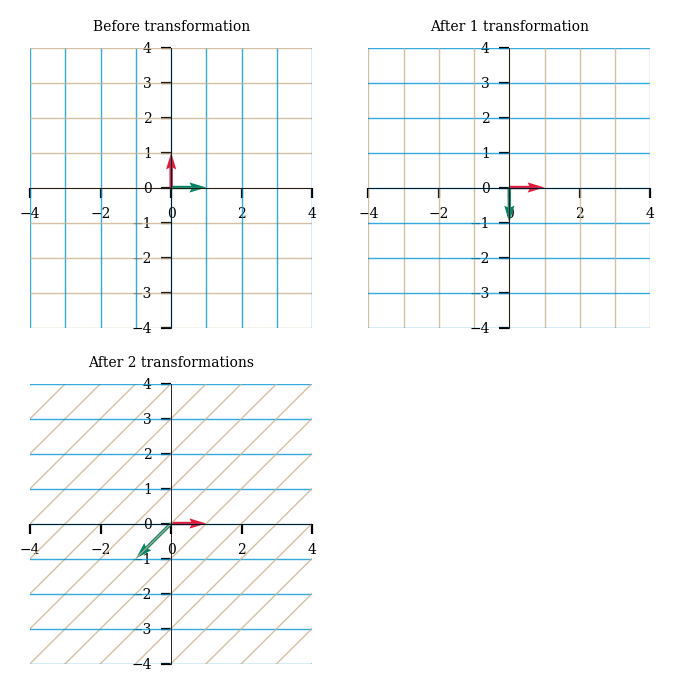

In [27]:
# the order of transformation: from right to left
plot_linear_transformations(rotation, shear)

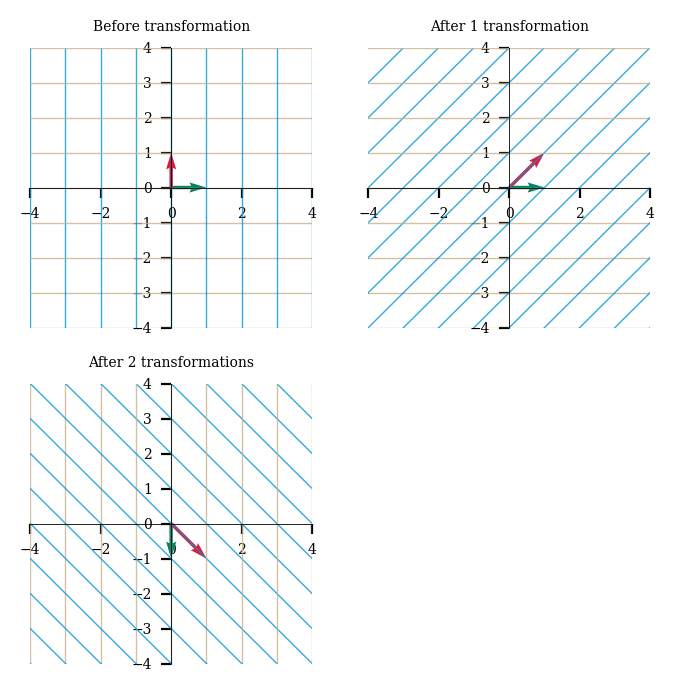

In [28]:
plot_linear_transformations(shear, rotation)

Nope. The result is not the same. The order of transformations matters and **matrix mulitiplication is not commutative** (in general).

[Matrix multiplication as composition](https://www.youtube.com/watch?v=XkY2DOUCWMU&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=4) beautifully illustrates the key idea of matrix multiplication as composition of linear transformations.

## Inverse of a matrix

Thinking of matrices as linear transformations also helps demistify the idea of an **inverse**. Imagine that you apply two transformations in sequence, and every vector in 2D space ends up just where it started. Well, that can happen when one transformation undoes the previous one. This means that the second transformation is the inverse of the first.

NumPy has great built-in Linear Algebra capabilities in the `numpy.linalg` module. Among its many functions, we get [`inv()`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.linalg.inv.html), to compute the inverse of a matrix. So we can try right away to visualize a sequence of transformations: first with the matrix $M$, then the inverse of $M$.

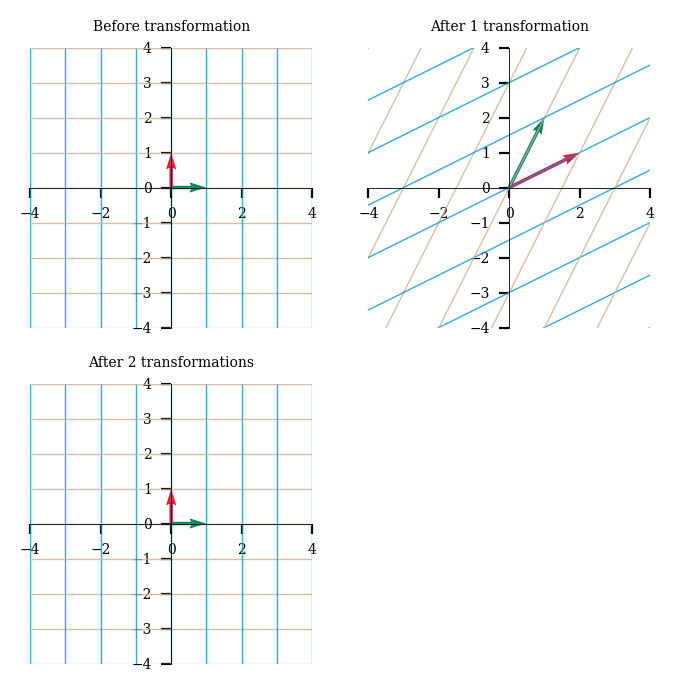

In [29]:
M = np.array([[1, 2], [2, 1]])
M_inv = np.linalg.inv(M)
plot_linear_transformations(M, M_inv)

The combined action of the linear transformation $M$ and its inverse $M^{-1}$ is to leave every vector the same. In other words, the matrix multiplication $M^{-1}M$ is equal to the identity $I$.

## Recap

- What is a vector.
- The two fundamental vector operations: vector addition and scaling.
- The concept of basis vectors.
- Making a linear combination of vectors; the concept of span.
- When a set of vectors is linearly independent.
- A matrix is a linear transformation.
- Matrix-vector multiplication: a combination of the matrix columns scaled by the vector components.
- Some special transformations: rotation, shear, scaling, identity.
- Matrix-matrix multiplication: composition of linear transformations.
- Idea of the matrix inverse: the transformation that reverses the effect of another.

---

# Eigenvectors

The eigenvectors of a matrix are the special vectors that don't change direction after a linear transformation. _They don't get thrown off their span!_. The eigenvalues represent the scaling on the eigenvectors by the transformation. And that is  a surprisingly useful fact. 

## Geometry of eigendecomposition

When you know the eigenvectors and eigenvalues, you know the matrix. Many applications of linear algebra benefit from expressing a matrix using its eigenvectors and eigenvalues (it often makes computations easier). 
This is called _eigendecomposition_—matrix. Decomposition is a central topic in linear algebra, and particularly important in applications.

### Eigenvectors revisited

Unit circle, by a 2D linear transformation, lands on an ellipse. The semi-major and semi-minor axes of the ellipse were in the direction of the *eigenvectors* of the transformation matrix. Now, you should know that this only happens with _symmetric_ matrices, but let's revisit this idea.

We'll work with the matrix $\,A = \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}$.

[[2 1]
 [1 2]]


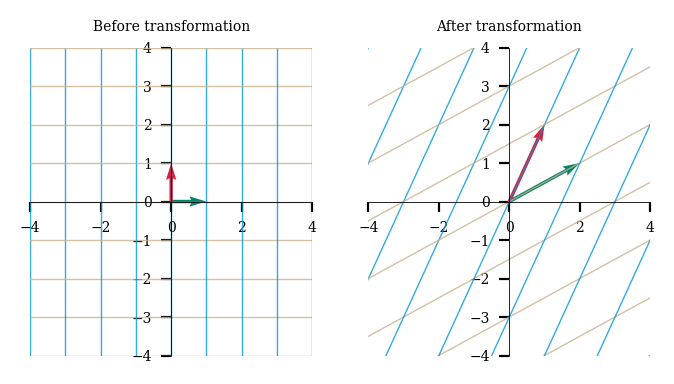

In [30]:
A = np.array([[2, 1], [1, 2]])  # symmetric matrix, rows and columns are interchangeable
print(A)
plot_linear_transformation(A)

Plot a set of vectors of unit length (whose heads trace the unit circle), visualize the transformed vectors, then compute the length of the semi-major and semi-minor axes of the ellipse (the norm of the longest and shortest vectors in our set).

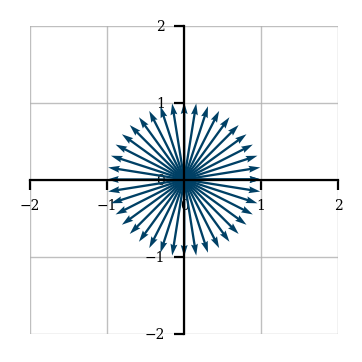

In [31]:
alpha = np.linspace(0, 2 * np.pi, 41)
vectors = list(zip(np.cos(alpha), np.sin(alpha)))
new_vectors = [A @ np.array(vectors[i]) for i in range(len(vectors))]
plot_vector(vectors)

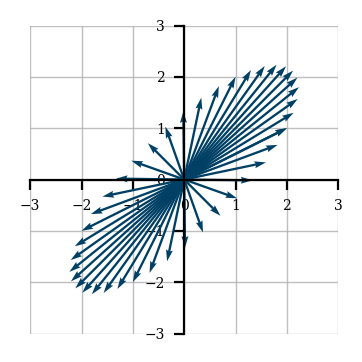

In [32]:
plot_vector(new_vectors)

In [33]:
lengths = [np.linalg.norm(new_vectors[i]) for i in range(len(new_vectors))]
semi_major = max(lengths)
print(f'Semi-major axis {semi_major:.1f}')
semi_minor = min(lengths)
print(f'Semi-minor axis {semi_minor:.1f}')

Semi-major axis 3.0
Semi-minor axis 1.0


In [34]:
u1 = np.array([semi_major / np.sqrt(2), semi_major / np.sqrt(2)])
print(u1)
u2 = np.array([-semi_minor / np.sqrt(2), semi_minor / np.sqrt(2)])
print(u2)

[2.12132034 2.12132034]
[-0.70710678  0.70710678]


### Scaling transformation

Some special transformations: _rotation_, _shear_, and _scaling_. 
Looking at the effect of the matrix transformation $A$ on the unit circle, we might imagine obtaining the same effect by first scaling the unit vectors—stretching $\mathbf{i}$ to $3\times$ its length and leaving $\mathbf{j}$ with length $1$—and then rotating by 45 degrees counter-clockwise.
We have also learned that applying linear transformations in sequence like this amounts to matrix multiplication.

Define the scaling transformation $S$, and apply it to the vectors mapping the unit circle. 

In [35]:
S = np.array([[3, 0], [0, 1]])
print(S)

[[3 0]
 [0 1]]


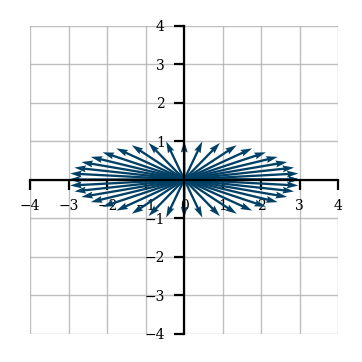

In [36]:
ellipse = [S @ np.array(vectors[i]) for i in range(len(vectors))]
plot_vector(ellipse)

### Rotation transformation

How do you rotate by any angle? You never have to memorize the "formula" for a rotation matrix. Just think about where the unit vectors land. Look at the figure below, and follow along on a piece of paper if you need to.

<img src="images/rotation.png" style="width: 300px;"/> 

#### Rotation of unit vectors by an angle $\theta$ to the left.

$$
\mathbf{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}  \Rightarrow  \begin{bmatrix} \cos{\theta} \\ \sin{\theta} \end{bmatrix} \\
\mathbf{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}  \Rightarrow  \begin{bmatrix} -\sin{\theta} \\ \cos{\theta} \end{bmatrix}
$$

You now can build the rotation matrix using the column vectors where each unit vector lands.

$$R = \begin{bmatrix} \cos{\theta} & -\sin{\theta} \\ \sin{\theta} & \cos{\theta} \end{bmatrix}$$

Great. Let's define a matrix $R$ that rotates vectors by 45 degrees.

In [37]:
theta = np.pi / 4
R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
print(R)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


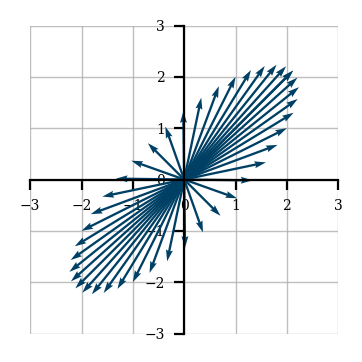

In [38]:
rotated = [R @ np.array(ellipse[i]) for i in range(len(vectors))]
plot_vector(rotated)

    Composition of the transformations

It certainly _looks_ like we recovered the picture we obtained originally when applying the transformation $A$ to all our vectors on the unit circle.  

But have a look at the two transformations—the scaling $S$ and the rotation $R$—applied in sequence:

[[3 0]
 [0 1]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


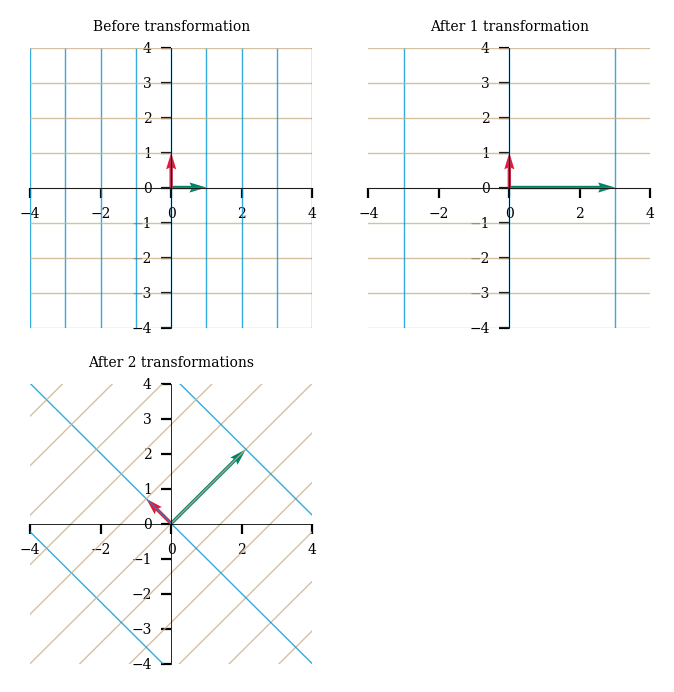

In [39]:
print(S)
print(R)
plot_linear_transformations(S, R)

Observe carefully the plot above. The scaling did stretch the basis vector $\mathbf{i}$ by $3\times$ its original length. It also left the basis vector $\mathbf{j}$ with its length equal to $1$. But something looks _really_ off after the second transformation. 

**What went wrong?** Let's investigate.

We know that the vector that lands on the ellipse's semi-major axis doesn't change direction. It's _not_ the basis vector $\mathbf{i}$ that lands there, it's the vector $\mathbf{v}_1$ that satisfies: 

$$ A \mathbf{v}_1 = s_1 \mathbf{v}_1 $$

Recalling the process, we find that vector, and plot it together with its transformed version (also called its _image_):

In [40]:
print(A)
print(u1)

[[2 1]
 [1 2]]
[2.12132034 2.12132034]


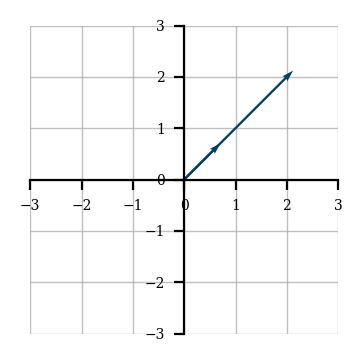

In [41]:
A_inv = np.linalg.inv(A)
v1 = A_inv @ u1
plot_vector([u1, v1])

Right. The unit vector that was aligned with the 45-degree line got transformed onto the semi-major axis of the ellipse, without being rotated. This is the effect of the matrix $A$ on $\mathbf{v}_1$: _it is just scaled_.

Now, let's look at the sequence of transformations $S$ and $R$ applied to $\mathbf{v}_1$. We apply the transformations by matrix-vector multiplication, and in the second step, we use composition of transformations.

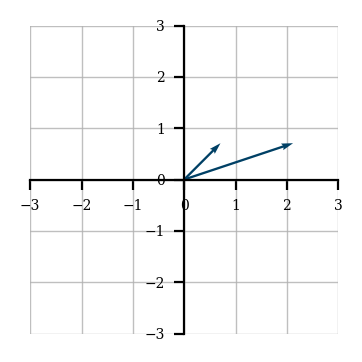

In [42]:
plot_vector([v1, S @ v1])

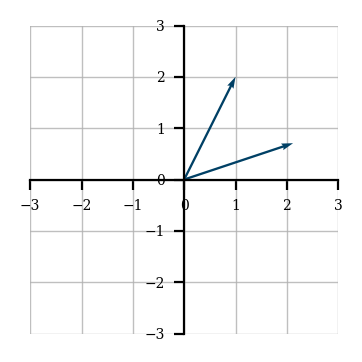

In [43]:
plot_vector([S @ v1, R @ S @ v1])

That is definitely _not_ what we expected. The scaling $S$ and the rotation $R$ applied in sequence are _not_ equivalent to the transformation $A$.

    Complete the composition

To get the same transformation as $A$ we had to _first_ rotate 45 degrees to the right (which leaves the plot of our circle unchanged even though the vectors rotated), _then_ scale, and finally rotate 45 degrees to the left. 

We will look at this sequence of transformations via matrix multiplicaton. But first note that a rotation by a negative angle $\theta$ is achieved by the matrix:

$$R^T = \begin{bmatrix} \cos{\theta} & \sin{\theta} \\ -\sin{\theta} & \cos{\theta} \end{bmatrix}$$

Check using a piece of paper that the columns of this matrix make sense for a negative angle $\theta$, and notice that it is the **transpose** of $R$, i.e., swaps rows and columns.
You can compute the transpose of a matrix in Python using [`numpy.matrix.transpose()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.transpose.html).

In [44]:
B = np.array([[1, 99], [2, 100]])
print(B)
print()
print(B.T)

[[  1  99]
 [  2 100]]

[[  1   2]
 [ 99 100]]


In [45]:
R @ S @ R

array([[ 1., -2.],
       [ 2., -1.]])

Now look at the result of the matrix multiplication (equivalent to the transformations in sequence, right to left):

In [46]:
R @ S @ R.T

array([[2., 1.],
       [1., 2.]])

That's certainly the same as $A$!

In [47]:
print(A)

[[2 1]
 [1 2]]


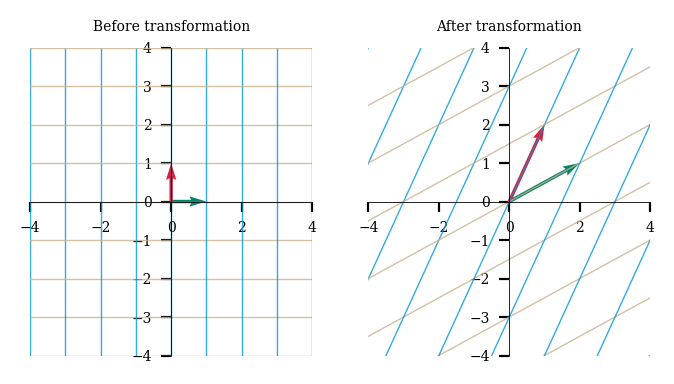

In [48]:
plot_linear_transformation(R @ S @ R.T)

We have some explaining to do. Let's visualize the transformation $R^T$, adding to our plot the unit vectors that were aligned with the eigenvectors, $\mathbf{v}_1$ and $\mathbf{v}_2$. You see that they land on the coordinate axes after the transformation.

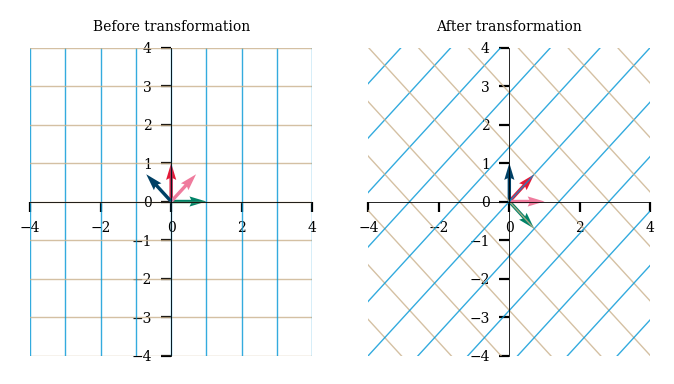

In [49]:
v2 = A_inv @ u2
plot_linear_transformation(R.T, v1, v2)

Now let's visualize applying  the scaling transformation to these vectors, and applying the rotation matrix $R$ after that.

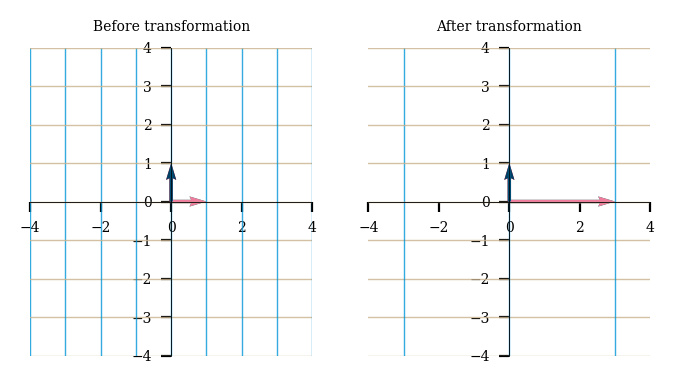

In [50]:
e1 = R.T @ v1
e2 = R.T @ v2
plot_linear_transformation(S, e1, e2)

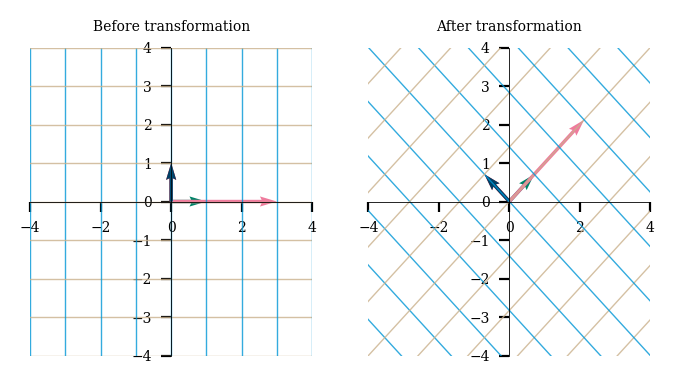

In [51]:
plot_linear_transformation(R, S @ e1, S @ e2)

The vectors $\mathbf{v}_1$ and $\mathbf{v}_2$ are first rotated to land on the axes, are then scaled, and are finally rotated back to their original direction. This has the same effect as the transformation $A$. In other words:


$$ A = R\, S\, R^T 
$$

The equivalence above shows an **eigendecomposition** of the matrix $A$. 
The scaling matrix $S$ has the *eigenvalues* along the diagonal, and the rotation matrix $R$ has the *eigenvectors* as columns. Let's check:

In [52]:
print(R[:, 0])
print(v1)

[0.70710678 0.70710678]
[0.70710678 0.70710678]


In [53]:
print(R[:, 1])
print(v2)

[-0.70710678  0.70710678]
[-0.70710678  0.70710678]


### Symmetric matrices, orthogonal eigenvectors

We figured out that the matrix that undoes the effect of the positive rotation $R$ is its transpose, $R^T$. But in general, the matrix that has the effect of undoing a transformation is the _inverse_ of this matrix. In fact, $R$ is special, because

$$ R^T = R^{-1} $$

##### Definition:

> A matrix $R$ whose transpose is equal to its inverse is called **orthogonal**.

The columns of an orthogonal matrix are orthogonal vectors of unit length (a.k.a., _orthonormal_). For our example, it means that the _eigenvectors of $A$ are orthogonal_.
This always happens with _symmetric matrices_. 

To check for the symmetry, we can use a logical operation:

In [54]:
print(R)
R.T == np.linalg.inv(R)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


array([[ True,  True],
       [ True,  True]])

In [55]:
print(A)
A == A.T

[[2 1]
 [1 2]]


array([[ True,  True],
       [ True,  True]])

And to confirm that the two eigenvectors are orthogonal, we take the dot product, which is zero for perpendicular vectors:

In [56]:
v1 @ v2

0.0

    Key idea:

> A _symmetric_ matrix, $\,A = A^T$, has _orthogonal_ eigenvectors, and can be decomposed as $A = R\, S\, R^T$, where $R$ has the eigenvectors as columns and $S$ is the diagonal matrix of eigenvalues.

## Eigendecomposition in general

[3:15](https://www.youtube.com/watch?v=4-P0gptDT40&list=LLqaZUbmWbk33CkdqqWfC1xw&index=32&t=3s)

Up to this point, we've been playing with a symmetric matrix. The geometric insight we developed showed us that the eigenvectors landed onto the semi-major and semi-minor axis of the ellipse coming from the unit circle. But most matrices are not symmetric!
Let's work the general case. The eigenvectors of $A$ get scaled after the transformation, i.e., land on their span:

$$
\begin{align*}
  A \mathbf{v_1} = s_1 \mathbf{v_1} \\
  A \mathbf{v_2} = s_2 \mathbf{v_2}
\end{align*}
$$

The two left-hand sides are matrix-vector multiplications, each giving a vector as result. The two right-hand sides are scalings of a column vector (also resulting in vectors). We would like to combine the two equations together into a matrix equation, leading to the eigendecomposition of $A$.

Our first idea is this: matrix-matrix multiplication is the same as applying a transformation via the matrix on the left, to the columns of the matrix on the right. So if we make a matrix with the two eigenvectors as columns, and multiply it with $A$:

$$ A \begin{bmatrix} \mathbf{v_1} & \mathbf{v_2} \end{bmatrix} = \begin{bmatrix} A\mathbf{v_1} & A\mathbf{v_2} \end{bmatrix} $$

We can now re-write the eigenvector equations into one matrix equation by matching columns:

$$ A \begin{bmatrix} \mathbf{v_1} & \mathbf{v_2} \end{bmatrix} = \begin{bmatrix} s_1\mathbf{v_1} & s_2\mathbf{v_2} \end{bmatrix} $$

Using $C$ to denote the matrix of eigenvectors, the left-hand side of this matrix equation is $A\, C$.  We can express the right-hand side of the combined eigenvector equations also using $C$, by working with each column:

$$ s_1 \mathbf{v_1} = \begin{bmatrix} \mathbf{v_1} & \mathbf{v_2} \end{bmatrix} \, \begin{bmatrix} s_1 \\ 0 \end{bmatrix} $$

$$ s_2 \mathbf{v_2} = \begin{bmatrix} \mathbf{v_1} & \mathbf{v_2} \end{bmatrix} \, \begin{bmatrix} 0 \\ s_2 \end{bmatrix} $$

Matchng the columns, and applying our first idea for matrix-matrix multiplication: 

$$ \begin{bmatrix} s_1\mathbf{v_1} & s_2\mathbf{v_2} \end{bmatrix} = C\, \begin{bmatrix} s_1 & 0 \\ 0 & s_2 \end{bmatrix} $$

Using $D$ to denote the diagonal matrix of eigenvalues, this all comes together as:

$$
  A\, C = C\, D
$$

If we right-multiply by $C^{-1}$ on both sides:

$$
  A = C\, D\, C^{-1}
$$

A matrix that can be decomposed in this way is called **diagonalizable**.
Multiplying on the right by $C$ and on the left by $C^{-1}$:

$$
  C^{-1} A\, C = D
$$

Applying the transformation $A$ to a vector in standard basis, $\mathbf{x}$, is:

$$
  A\, \mathbf{x} = C\, D\, C^{-1}\mathbf{x}
$$

Viewing $C$ as a change of basis, the expression on the right means we change $\mathbf{x}$ to a new basis of eigenvectors, apply a scaling by the eigenvalues in the new coordinate system, and change back to the standard basis. The effect is the same as the transformation $A$: the matrices $A$ and $D$ are called **similar**.

    Key idea:

> Similar matrices have the same effect, via a change of basis.

Now let's visualize the eigendecomposition of a non-symmetric matrix $A = \begin{bmatrix} 1 & 0 \\ 1 & 3 \end{bmatrix}$. 

[[1 0]
 [1 3]]


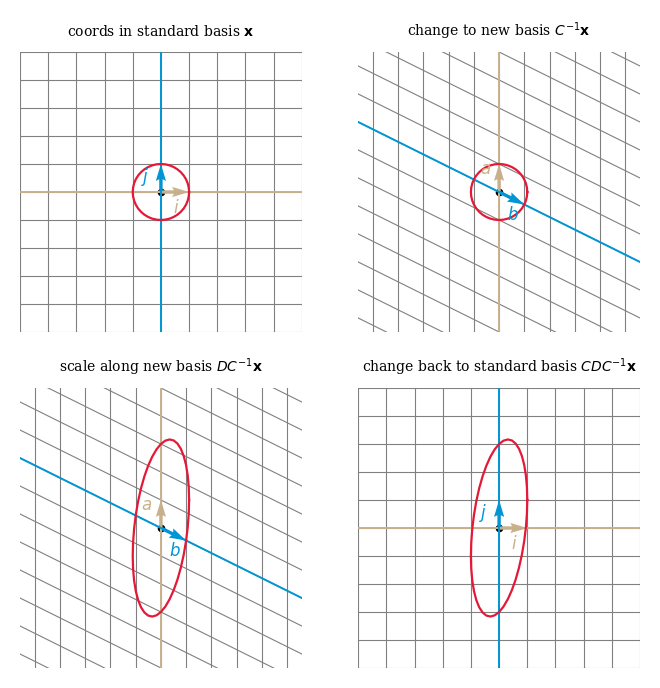

In [57]:
A = np.array([[1, 0], [1, 3]])
print(A)
plot_eigen(A)

The red unit circle below represents a bunch of vectors of different angles whose tails sit at the origin and whose heads land on the circle. Each point on this circle corresponds to some vector $\mathbf{x}$. The second subplot shows the change from the standard basis $\mathbf{i}$ and $\mathbf{j}$ to the new basis $\mathbf{a}$ and $\mathbf{b}$. Notice that the red circle representing $\mathbf{x}$ does not change, however, the vector $\mathbf{x}$'s new coordinates are now $C^{-1}\mathbf{x}$. The third subplot demonstrates the stretching effect coming from the diagonal matrix $D$ in the new basis. The transformed vector's coordinates are $DC^{-1}\mathbf{x}$ in the new basis. Finally, we change back to the standard basis by multiplying $C$ as shown in the subplot 4.

##### Challenge:
> What is the relation between the new basis $\mathbf{a}$, $\mathbf{b}$ and the matrix of eigenvectors $C$?

Visualize the eigendecomposition of a symmetric matrix $\,W = \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}$  for comparison. 

[[2 1]
 [1 2]]


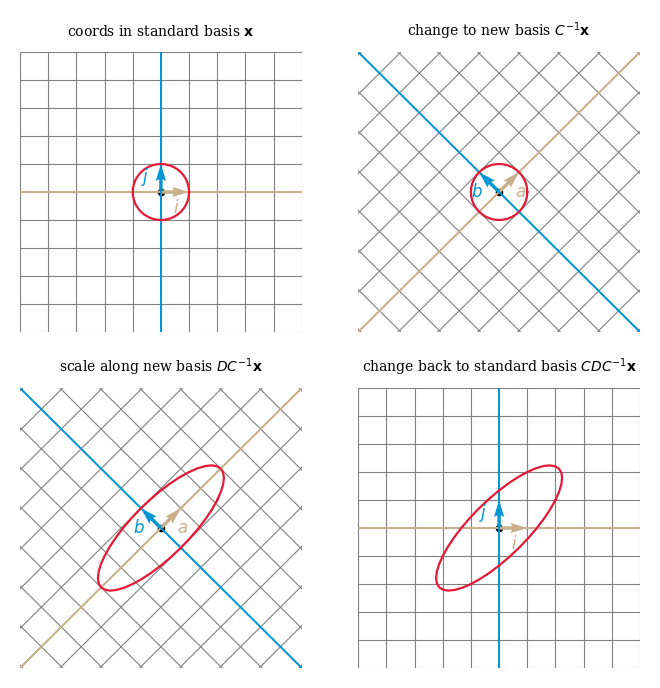

In [58]:
W = np.array([[2, 1], [1, 2]])
print(W)
plot_eigen(W)

## Compute eigenthings in Python

You can compute the eigenvalues and eigenvectors of a matrix using [`numpy.linalg.eig()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html). It returns a tuple: its first element is an array with the eigenvalues, and its second element is a 2D array  where each column is an eigenvector.

In [59]:
np.linalg.eig(A)

(array([3., 1.]),
 array([[ 0.        ,  0.89442719],
        [ 1.        , -0.4472136 ]]))

In [60]:
# display each eigenvalue with the corresponding eigenvector
eigenvalues, eigenvectors = np.linalg.eig(A)

for eigenvalue, eigenvector in zip(eigenvalues, eigenvectors.T):
    print(f'eigenvalue: {eigenvalue} eigenvector: {eigenvector}')

eigenvalue: 3.0 eigenvector: [0. 1.]
eigenvalue: 1.0 eigenvector: [ 0.89442719 -0.4472136 ]


In the `for` statement above, each iteration picks an eigenvalue, and the corresponding eigenvector. Note that when iterating over a 2D array, the natural order advances over the first dimension: the rows; to get the columns, we apply the transpose of the `eigenvectors` matrix.

To create the diagonal matrix of eigenvalues, use [`numpy.diag()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.diag.html): if you give it a 1D array, it returns a 2D array with the elements of the input array in the diagonal. 

The eigendecomposition is shown below: 

In [61]:
C = eigenvectors
A_decomp = C @ np.diag(eigenvalues) @ np.linalg.inv(C)
print(A_decomp)

[[1. 0.]
 [1. 3.]]


Another way to compute all the eigenthings is to use **SymPy**: the Python library for symbolic computations (a.k.a., computer algebra system). SymPy has a [`Matrix`](https://docs.sympy.org/latest/tutorial/matrices.html) data type with many advanced methods. 

You will create a `Matrix` from a list of row vectors, and then use the `diagonalize()` method to obtain the matrix of eigenvectors, and the diagonal matrix of eigenvalues.

In [62]:
A = sympy.Matrix([[2, 1], [1, 2]])
A

⎡2  1⎤
⎢    ⎥
⎣1  2⎦

In [63]:
A == A.T

True

In [64]:
C, D = A.diagonalize()
D

⎡1  0⎤
⎢    ⎥
⎣0  3⎦

With SymPy, you can also get just the eigenvalues using the [`eigenvals()`](https://docs.sympy.org/latest/tutorial/matrices.html#eigenvalues-eigenvectors-and-diagonalization) method. Its output will be in the form $\{s_1:m_1, s_2:m_2\}$, where $s_1$, $s_2$ are the eigenvalues of the matrix, and $m_1$, $m_2$ are the _multiplicities_. A matrix can have (multiply) repeated eigenvalues sometimes. In the case of our matrix $A$, both eigenvalues are unique (i.e., have multiplicity $1$).

In [65]:
A.eigenvals()

{1: 1, 3: 1}

But think of the identity matrix: it has $1$ along the diagonal, and the two eigenvalues are the same, $1$. We can create an identity matrix in SymPy using `eye(n)`, with `n` indicating the dimension.

In [66]:
sympy.eye(2).eigenvals()

{1: 2}

If we try with the _shear_ matrix, we see that it also has a repeated $1$ eigenvalue.

In [67]:
shear = sympy.Matrix([[1, 1], [0, 1]])
shear

⎡1  1⎤
⎢    ⎥
⎣0  1⎦

In [68]:
shear.eigenvals()

{1: 2}

Let's have a look back at the equation for the eigenvectors—on which the effect of a matrix $A$ is just to scale them—and rearrange things a bit:

$$ \begin{align*} A\, \mathbf{v} &= s\, \mathbf{v}\\ A\, \mathbf{v} - s\, \mathbf{v} &= \mathbf{0} \\ (A - s\, I) \mathbf{v} &= \mathbf{0} \end{align*} $$

The last form represents a homogeneous linear system, whose solutions are the _nullspace_ of $(A-s\,I)$. We can compute the nullspace using SymPy; let's try it with the shear matrix:

In [69]:
(shear - sympy.eye(2)).nullspace()

⎡⎡1⎤⎤
⎢⎢ ⎥⎥
⎣⎣0⎦⎦

The [`nullspace()`](https://docs.sympy.org/latest/tutorial/matrices.html#nullspace) method of SymPy matrices returns a list of column vectors that span the nullspace of the matrix. In the case of the shear matrix, only one column vector is returned, which means its nullspace is a line.

The shear matrix has one repeated eigenvalue, and a single eigenvector: we cannot build a change of basis with its eigenvectors, which means it's _not diagonalizable_.

If you tried to use `diagonalize()` on the shear matrix, you would get an error message:
```Pyhon
MatrixError: Matrix is not diagonalizable
```

## Applications

### Eigenvalues in ecology

A neat application of linear algebra is _matrix population models_, used broadly in ecology and demographics. One type of model considers the age distribution of fertility and survival in an animal or plant population. For example, an insect population may have different probability of survival depending on the stage of development, and only be able to reproduce in an adult stage.

Here's an example, from [$\S$5.6](https://textbooks.math.gatech.edu/ila/stochastic-matrices.html) of the open book _"Interactive Linear Algebra"_. 
We take three age groups in a population of rabbits. Of the newborn rabbits, 50% survive their first year. The survival of the second age group is also 50%, and the third age group all dies off at the end of the year. The annual fertility of each age group is 0, 6, and 8 rabbits, respectively.

A population vector $\mathbf{p}=(p_1, p_2, p_3)$ contains the abundance of rabbits in each age group. We can use the fertility and survival of each age group to predict the abundance of each group after one year:

$$\begin{align*} p_1^{n+1} &=& 0\,p_1^n + 6\,p_2^n + 8\,p_3^n \\ p_2^{n+1} &=& 0.5\,p_1^n + 0\,p_2^n + 0\,p_3^n \\ p_3^{n+1} &=& 0\,p_1^n + 0.5\,p_2^n + 0\,p_3^n \end{align*} $$

The superscript $n$ refers to the year. The coefficient matrix of this system of equations is:

$$ L = \begin{bmatrix} 0 & 6 & 8 \\ 0.5 & 0 & 0 \\ 0 & 0.5 & 0 \end{bmatrix} $$

This matrix represents the _age transition_ year on year. Multiply this matrix by the population vector to get the age-structured population on the next year. Let's write a bit of code to see the population in each age group grow over 10 years. 

In [70]:
L = np.array([[0, 6, 8], [.5, 0, 0], [0, .5, 0]])
print(L)

[[0.  6.  8. ]
 [0.5 0.  0. ]
 [0.  0.5 0. ]]


In [71]:
p = np.array([25, 10, 5])  # initial age-structured populations

In [72]:
N = 10
pn = np.zeros((N, len(p)))
pn[0, :] = p.copy()

for i in range(1, N):
    pn[i, :] = L @ pn[i - 1, :]

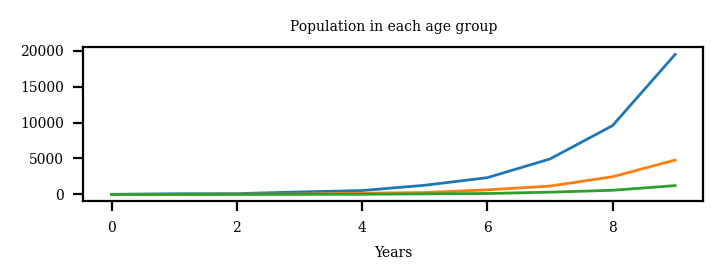

In [73]:
plt.figure(figsize=(4, 1))
plt.plot(pn[:, 0])
plt.plot(pn[:, 1])
plt.plot(pn[:, 2])
plt.xlabel('Years')
plt.title('Population in each age group');

Nothing to see here: the population in each age group grows over time. But one question ecologists may need to answer is whether the species reaches a stable growth pattern, and what is the _stable age distribution_. That occurs if the percentage in each age group remains the same, i.e., $\mathbf{p}^{n+1}$ is a multiple of $\mathbf{p}^n$:

$$ \mathbf{p}^{n+1} = L\, \mathbf{p}^n = r\, \mathbf{p}^n $$

We have on the right an eigenvalue problem, and the stable age distribution is an eigenvector of the age transition matrix.

A classic example in this field is the hypothetical beetle population of Bernadelli, also separated in three age groups, and with age transition matrix:

$$ T = \begin{bmatrix} 0 & 0 & 6 \\ 1/2 & 0 & 0 \\ 0 & 1/3 & 0 \end{bmatrix} $$

In [74]:
T = np.array([[0, 0, 6], [.5, 0, 0], [0, 1 / 3, 0]])
print(T)

[[0.         0.         6.        ]
 [0.5        0.         0.        ]
 [0.         0.33333333 0.        ]]


In [75]:
N = 24
pn = np.zeros((N, len(p)))
pn[0, :] = p.copy()

for i in range(1, N):
    pn[i, :] = T @ pn[i - 1, :]

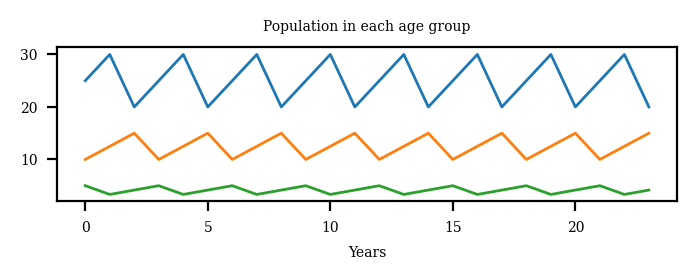

In [76]:
plt.figure(figsize=(4, 1))
plt.plot(pn[:, 0])
plt.plot(pn[:, 1])
plt.plot(pn[:, 2])
plt.xlabel('Years')
plt.title('Population in each age group');

In this case, the initial population distribution repeats every few years! If we look at the eigenvectors for the matrix, in this case ... gadzooks! They are complex numbers.
In Python, complex numbers are represented as the sum of a real part and an imaginary part, using the symbol `j` for the imaginary unit corresponding to $\sqrt{-1}$.

In [77]:
np.linalg.eig(T)[0]

array([-0.5+0.8660254j, -0.5-0.8660254j,  1. +0.j       ])

### Markov chains

Population models are one example of _discrete dynamical systems_, where eigenvalues and eigenvectors play a central role. Another example are _Markov chains_, of broad application in economics, genetics, game theory, and more.

This example is from [_Understanding Linear Algebra_](http://merganser.math.gvsu.edu/david/linear.algebra/ula/ula/ula.html). A movie rental company has three offices in a city. You can rent movies from one office, and return them the next day in any office. Suppose the 3D vector $\mathbf{x}$ represents the percentage of the stock of "The Matrix" in each office. 

From historical data, one could build a matrix $P$ with the probabilities that a customer rented "The Matrix" from office $j$ and returns it at office $i$ the next day. Say, 

$$ P = \begin{bmatrix} 0.3 & 0.4 & 0.5 \\ 0.3 & 0.4 & 0.3 \\ 0.4 & 0.2 & 0.2 \end{bmatrix} $$

A customer must return the movie in one of the three offices, so the probabilities for the three offices have to add up to $1$.
If $\mathbf{x}_k$ is the movie-stock distribution on a given day, then $P\,\mathbf{x}_k$ is the per-office distribution on the next day:

$$ \mathbf{x}_{k+1} = P\,\mathbf{x}_k  $$

##### Definition:

> A **probability vector** has non-negative components that add to $1$. A **stochastic matrix** is a square matrix whose columns are probability vectors.

> A **Markov chain** is a sequence of probability vectors $ \mathbf{x}_{k+1} = P\,\mathbf{x}_k  $, where $P$ is a stochastic matrix.

Let's play with the stochastic matrix $P$. We can visually see that each column adds up to $1$, so no need to compute that. But let's get the eigenvalues and eigenvectors using SymPy.

In [78]:
P = sympy.Matrix([[.3, .4, .5], [.3, .4, .3], [.4, .2, .2]])
P

⎡0.3  0.4  0.5⎤
⎢             ⎥
⎢0.3  0.4  0.3⎥
⎢             ⎥
⎣0.4  0.2  0.2⎦

In [79]:
P.eigenvals()

{-1/5: 1, 1/10: 1, 1: 1}

In [80]:
P.eigenvects()

⎡⎛         ⎡⎡-1.0⎤⎤⎞  ⎛        ⎡⎡0.5 ⎤⎤⎞  ⎛        ⎡⎡1.4⎤⎤⎞⎤
⎢⎜         ⎢⎢    ⎥⎥⎟  ⎜        ⎢⎢    ⎥⎥⎟  ⎜        ⎢⎢   ⎥⎥⎟⎥
⎢⎜-0.2, 1, ⎢⎢ 0  ⎥⎥⎟, ⎜0.1, 1, ⎢⎢-1.5⎥⎥⎟, ⎜1.0, 1, ⎢⎢1.2⎥⎥⎟⎥
⎢⎜         ⎢⎢    ⎥⎥⎟  ⎜        ⎢⎢    ⎥⎥⎟  ⎜        ⎢⎢   ⎥⎥⎟⎥
⎣⎝         ⎣⎣1.0 ⎦⎦⎠  ⎝        ⎣⎣1.0 ⎦⎦⎠  ⎝        ⎣⎣1.0⎦⎦⎠⎦

We see that the largest eigenvalue is $1$. This is true for _all_ stochastic matrices, in fact: they have $1$ as eigenvalue and all other eigenvalues are smaller in absolute value.

##### Key idea:

> Stochastic matrices have $1$ as the dominant eigenvalue:

> if $s_k$ are the eigenvalues, $|s_k|\leq 1$.

Think about it: multiplying a matrix by the vector of ones $(1, 1, 1)$ adds up the rows (linear combination of the columns, each multiplied by $1$). For a stochastic matrix $P$, the rows of the transpose $P^T$ add up to $1$, so: $P^T \mathbf{1} = \mathbf{1}$, which means $1$ is an eigenvalue of $P^T$ and $P$ (a matrix and its transpose have the same eigenvalues).

In [81]:
one_vector = sympy.Matrix([1, 1, 1])

P.T @ one_vector

⎡1.0⎤
⎢   ⎥
⎢1.0⎥
⎢   ⎥
⎣1.0⎦

In [82]:
P.eigenvals() == P.T.eigenvals()

True

Let's see what happens to the vector $\mathbf{x}$, representing the percentages of the movie stock in each office, after several days.

In [83]:
P2 = np.array(P)
x = np.array([.1, .4, .5])
N = 10
xn = np.zeros((N, len(p)))
xn[0, :] = x.copy()

for i in range(1, N):
    xn[i, :] = P2 @ xn[i - 1, :]

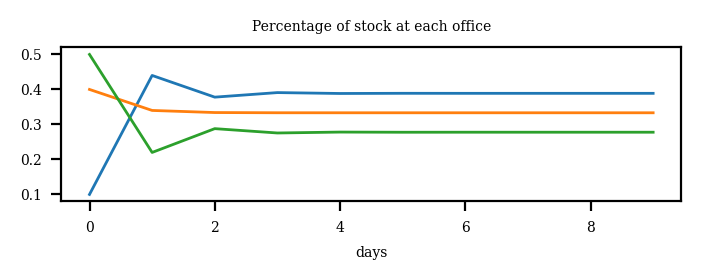

In [84]:
plt.figure(figsize=(4, 1))
plt.plot(xn[:, 0])
plt.plot(xn[:, 1])
plt.plot(xn[:, 2])
plt.xlabel('days')
plt.title('Percentage of stock at each office');

You can try it with different initial distributions of the movie stock, and you will see that the long-term distribution is always the same: the long-term behavior of a Markov chain is a **steady state**. This steady state is aligned with the eigenvector corresponding to eigenvalue $1$. Let's check:

In [85]:
steady = sympy.Matrix(xn[-1, :])
steady

⎡0.3888890254⎤
⎢            ⎥
⎢0.3333333334⎥
⎢            ⎥
⎣0.2777776412⎦

In [86]:
steady.normalized()

⎡0.667424016931347⎤
⎢                 ⎥
⎢0.572077528097156⎥
⎢                 ⎥
⎣0.476731038919718⎦

In [87]:
evec = sympy.Matrix(P.eigenvects()[2][2])
evec

⎡1.4⎤
⎢   ⎥
⎢1.2⎥
⎢   ⎥
⎣1.0⎦

In [88]:
evec.normalized()

⎡0.667423812471915⎤
⎢                 ⎥
⎢0.572077553547355⎥
⎢                 ⎥
⎣0.476731294622796⎦

The normalized steady-state vector and eigenvector corresponding to the $1$ eigenvalue are the same, up to a small difference that will diminish if we add more steps to the chain.

How can we explain this? First, remember that $ \mathbf{x}_{k+1} = P\,\mathbf{x}_k  $. So, $ \mathbf{x}_2 = P\, \mathbf{x}_1 = P^2 \mathbf{x}_0 $. In general,

$$ \mathbf{x}_{k} = P^{k}\,\mathbf{x}_0  $$

Second, the eigenvectors form a basis, so we can write any vector as a linear combination of them. Let's call them $\mathbf{e}_1$, $\mathbf{e}_2$, $\mathbf{e}_3$:
$$ \mathbf{x}_0 = c_1 \mathbf{e}_1 + c_2 \mathbf{e}_2 + c_3 \mathbf{e}_3 $$

Multiply by the matrix $P$ on both sides, and on the right side use the definition of eigenvectors that $P \mathbf{e}_i = s_i \mathbf{e}_i$ (where $s_i$ are the eigenvalues):

$$ P\, \mathbf{x}_0 = c_1 s_1\mathbf{e}_1 + c_2 s_2\mathbf{e}_2 + c_3 s_3\mathbf{e}_3 $$

If you multiply $k$ times by $P$, you get:

$$ P^{\,k}\, \mathbf{x}_0 = c_1 s_1^k\mathbf{e}_1 + c_2 s_2^k\mathbf{e}_2 + c_3 s_3^3\mathbf{e}_3 $$

The only term in the linear combination that survives long-term is the one aligned with the eigenvector corresponding to eigenvalue $1$. The powers of other eigenvalues for which $|s_i|<1$ all tend to zero as $k$ increases.

##### Key idea:

> A **steady state** of a Markov chain is an eigenvector of the stochastic matrix, corresponding to eigenvalue $1$.

##### Perron-Frobenius Theorem

> A _positive stochastic matrix_ (all positive entries) has a unique steady state vector to which all initial states converge.

Here's another way to look at it. The eigendecomposition of $P$ is formed with the two matrices returned by `diagonalize()`: 

In [89]:
P

⎡0.3  0.4  0.5⎤
⎢             ⎥
⎢0.3  0.4  0.3⎥
⎢             ⎥
⎣0.4  0.2  0.2⎦

In [90]:
P.diagonalize()

⎛⎡-1.0  1.0   7.0⎤  ⎡-0.2   0    0 ⎤⎞
⎜⎢               ⎥  ⎢              ⎥⎟
⎜⎢ 0    -3.0  6.0⎥, ⎢ 0    0.1   0 ⎥⎟
⎜⎢               ⎥  ⎢              ⎥⎟
⎝⎣1.0   2.0   5.0⎦  ⎣ 0     0   1.0⎦⎠

The matrix $P$ is _similar_ (has the same effect via a change of basis) to a scaling matrix which, when repeatedly applied, shrinks al components _not_ parallel to the eigenvector corresponding to eigenvalue $1$.

### Google's PageRank algorithm

Web search today uses a variety of technologies, but the original algorithm that rocketed Google to the top of search engines is the _PageRank_ algorithm. Google's own description was:

> PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites.

(Cited in the Wikipedia entry for [PageRank](https://en.wikipedia.org/wiki/PageRank), from an archived Google web page.)

A web page's rank of importance is computed from the number of links to it, and the importance of the pages that link to it. The rule is that a page linking to $n$ other pages passes to them $1/n$ of its importance. A page's rank is the sum of all the importance it gets from other pages linking to it.

For a network of $n$ web pages, you form a matrix whose $i,j$ entry is the importance page $j$ passes to $i$.
Here's an example. We have a network with four web pages, connected by links as shown in the figure below.

<img src="images/PR-4pages.png" style="width: 500px;"/>

#### Example network of four web pages

* Page A has 3 links: it passes $1/3$ of its rank to $B, C, D$
* Page B has 2 links: it passes $1/2$ of its rank to $C, D$
* Page C has 0 links
* Page D has 2 links: it passes $1/2$ of its rank o $A,C$

The importance matrix is:
$$A = \begin{bmatrix} 0   & 0   & 0 & 1/2 \\ 1/3 & 0   & 0 & 0  \\ 1/3 & 1/2 & 0 & 1/2 \\ 1/3 & 1/2 & 0 & 0 \end{bmatrix} $$

This would be a stochastic matrix, except for the column of zeros, due to a web page with no links. Fix this problem by replacing the zeros in that column with $1/n$. This _modified_ importance matrix, $A^{\prime}$ is always stochastic.  Now choose a value $p \in (0,1)$, called the _damping factor_, to build the **Google matrix** as follows:

$$
  G = (1-p)\, A^{\prime} + p\, B
$$

where $B$ is an $n\times n$ matrix with $1/n$ in every entry.

##### Key idea: 

> The Google matrix is a positive stochastic matrix. The PageRank vector is the steady state vector of the Markov chain with this matrix.

Let's play with a network of four pages like the one illustrated above, but fill the column corresponding to $C$ with $1/4$. Choose $d=0.85$ for the damping factor.

In [91]:
Amod = np.array([[0, 0, 1 / 4, .5], [1 / 3, 0, 1 / 4, 0], [1 / 3, .5, 1 / 4, .5], [1 / 3, .5, 1 / 4, 0]])
print(Amod)

[[0.         0.         0.25       0.5       ]
 [0.33333333 0.         0.25       0.        ]
 [0.33333333 0.5        0.25       0.5       ]
 [0.33333333 0.5        0.25       0.        ]]


Let's write a Python function with the PageRank algorithm, taking as inputs the modified importance matrix, the damping factor, and a tolerance to exit the Markov chain. The function initializes a random starting vector (normalized), computes the Google matrix, then applies it repeatedly until two successive state vectors are "close enough" to each other (i.e., by less than the tolerance).

In [92]:
pagerank(Amod)

array([[0.21923755],
       [0.17523074],
       [0.35582792],
       [0.2497038 ]])

The result above is the PageRank vector for this small network of four web pages. The largest vector value is the third component, corresponding to page $C$, the highest-ranked page. Page $B$ is the lowest ranked (second component).
The interpretation of this result is as a probability distribution for the likelihood that a person surfing the web will randomly click through to arrive at one of the pages in the network. 

Build the Google matrix with $d=0.85$ for the network illustrated below, then find the PageRank vector. Ponder the result and identify the highest ranked and lowest ranked pages.

<img src="images/google-irreducible.png" style="width: 400px;"/>

* Page $1$ has $2$ links: it passes $1/2$ of its rank to $2$, $3$
* Page $2$ has $1$ link:  it passes $1$ of its rank to $4$
* Page $3$ has $2$ links: it passes $1/2$ of its rank to $2$, $5$
* Page $4$ has $2$ links: it passes $1/2$ of its rank to $2$, $6$
* Page $5$ has $3$ links: it passes $1/3$ of its rank to $6$, $7$, $8$
* Page $6$ has $1$ link:  it passes $1$ of its rank to $8$
* Page $7$ has $3$ links: it passes $1/3$ of its rank to $1$, $5$, $8$
* Page $8$ has $2$ links: it passes $1/2$ of its rank to $6$, $7$

In [93]:
GS = sympy.Matrix([[0, 0, 0, 0, 0, 0, 1 / 3, 0], [.5, 0, .5, .5, 0, 0, 0, 0], 
                   [.5, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], 
                   [0, 0, .5, 0, 0, 0, 1 / 3, 0], [0, 0, 0, .5, 1 / 3, 0, 0, .5], 
                   [0, 0, 0, 0, 1 / 3, 0, 0, .5], [0, 0, 0, 0, 1 / 3, 1, 1 / 3, 0]])
GS

⎡ 0   0   0    0           0          0  0.333333333333333   0 ⎤
⎢                                                              ⎥
⎢0.5  0  0.5  0.5          0          0          0           0 ⎥
⎢                                                              ⎥
⎢0.5  0   0    0           0          0          0           0 ⎥
⎢                                                              ⎥
⎢ 0   1   0    0           0          0          0           0 ⎥
⎢                                                              ⎥
⎢ 0   0  0.5   0           0          0  0.333333333333333   0 ⎥
⎢                                                              ⎥
⎢ 0   0   0   0.5  0.333333333333333  0          0          0.5⎥
⎢                                                              ⎥
⎢ 0   0   0    0   0.333333333333333  0          0          0.5⎥
⎢                                                              ⎥
⎣ 0   0   0    0   0.333333333333333  1  0.333333333333333   0 ⎦

In [94]:
G = np.array(GS)
G.shape

(8, 8)

In [95]:
pagerank(G)

array([[0.0603768961691377],
       [0.111551088442221],
       [0.0444101808719169],
       [0.113568425175844],
       [0.0792512230396838],
       [0.195185037767514],
       [0.146918457067756],
       [0.248738691465925]], dtype=object)

The result above is the PageRank vector for the google matrix above. The largest vector value is the eight component, corresponding to page $8$, the highest-ranked page. Page $3$ is the lowest ranked.
The interpretation of this result is that links to a specific pages are important e.g. highest $8$ page is linked to 2nd and 3rd highest ranked page. 

---